In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [13]:
file_path = "HousePricePrediction.xlsx - Sheet1.csv"
dataset = pd.read_csv(file_path)

In [14]:
print("Dataset Overview:")
print(dataset.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


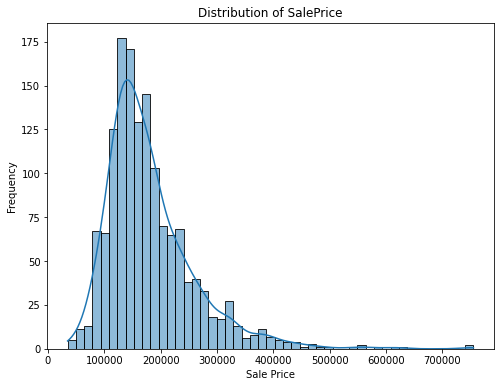

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
dataset['SalePrice'].fillna(dataset['SalePrice'].mean(), inplace=True)
dataset.dropna(inplace=True)

In [17]:
X = dataset.drop(['SalePrice'], axis=1)
y = dataset['SalePrice']
X

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0


In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:

from sklearn.preprocessing import OneHotEncoder
 
s = (dataset.dtypes == 'object')
categorical_cols = list(s[s].index)
print("Categorical variables:")
print(categorical_cols)
print('No. of. categorical features: ', 
      len(categorical_cols))
X_combined = pd.concat([X_train[categorical_cols], X_valid[categorical_cols]], axis=0)


X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)


X_train_encoded = X_combined_encoded[:len(X_train)]
X_valid_encoded = X_combined_encoded[len(X_train):]
X_train_encoded

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
1453,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2021,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
188,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1273,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1960,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
835,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1653,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2612,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:

X_combined = pd.concat([X_train[categorical_cols], X_valid[categorical_cols]], axis=0)


X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)


X_train_encoded = X_combined_encoded[:len(X_train)]
X_valid_encoded = X_combined_encoded[len(X_train):]


In [36]:

X_combined = pd.concat([X_train[categorical_cols], X_valid[categorical_cols]], axis=0)


X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)
X_train_encoded = X_combined_encoded.iloc[:len(X_train)]
X_valid_encoded = X_combined_encoded.iloc[len(X_train):]


encoded_feature_names = X_combined_encoded.columns
X_train_encoded.columns = encoded_feature_names
X_valid_encoded.columns = encoded_feature_names


In [37]:

X_train_final = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_valid_final = pd.concat([X_valid.drop(categorical_cols, axis=1), X_valid_encoded], axis=1)


In [38]:
model_SVR = SVR()
model_SVR.fit(X_train_final, y_train)
y_pred_SVR = model_SVR.predict(X_valid_final)
mae_SVR = mean_absolute_error(y_valid, y_pred_SVR)
mape_SVR = mean_absolute_percentage_error(y_valid, y_pred_SVR)
print("Support Vector Regression (SVR) MAE:", mae_SVR)
print("Support Vector Regression (SVR) MAPE:", mape_SVR)

Support Vector Regression (SVR) MAE: 28848.42142011633
Support Vector Regression (SVR) MAPE: 0.18704776664625575


In [39]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_train_final, y_train)
y_pred_RFR = model_RFR.predict(X_valid_final)
mae_RFR = mean_absolute_error(y_valid, y_pred_RFR)
mape_RFR = mean_absolute_percentage_error(y_valid, y_pred_RFR)
print("Random Forest Regression (RFR) MAE:", mae_RFR)
print("Random Forest Regression (RFR) MAPE:", mape_RFR)

Random Forest Regression (RFR) MAE: 12651.808758641275
Random Forest Regression (RFR) MAPE: 0.07583348261471638


In [40]:
model_LR = LinearRegression()
model_LR.fit(X_train_final, y_train)
y_pred_LR = model_LR.predict(X_valid_final)
mae_LR = mean_absolute_error(y_valid, y_pred_LR)
mape_LR = mean_absolute_percentage_error(y_valid, y_pred_LR)
print("Linear Regression (LR) MAE:", mae_LR)
print("Linear Regression (LR) MAPE:", mape_LR)

Linear Regression (LR) MAE: 30746.8014848619
Linear Regression (LR) MAPE: 0.18633441531347217


<AxesSubplot:>

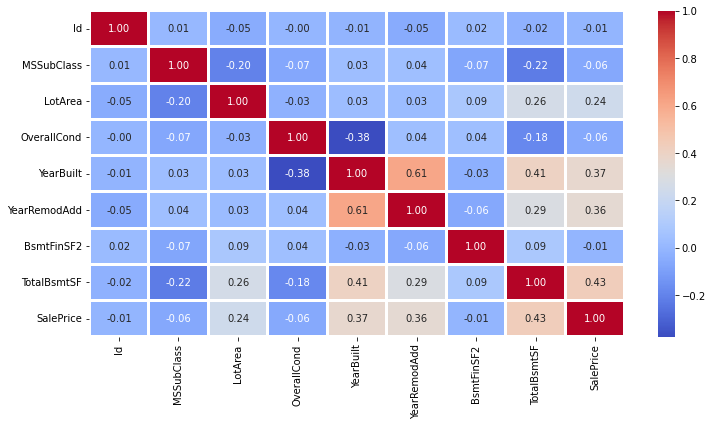

In [41]:

plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap='coolwarm',
            fmt='.2f',
            linewidths=2,
            annot=True)

<AxesSubplot:title={'center':'Count of Categorical Features'}, xlabel='count', ylabel='MSZoning'>

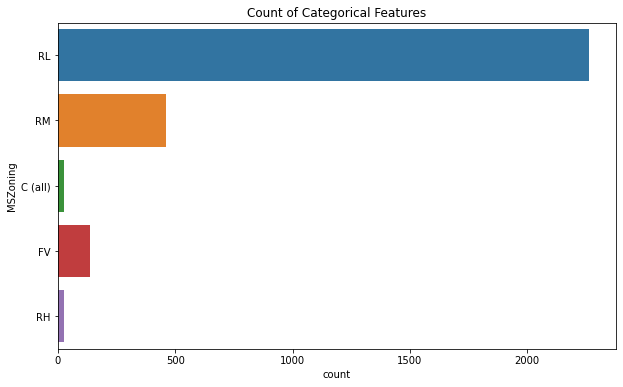

In [42]:
# Countplot of categorical feature
plt.figure(figsize=(10, 6))
plt.title('Count of Categorical Features')
sns.countplot(data=dataset, y='MSZoning')

<AxesSubplot:title={'center':'Distribution of SalePrice'}, xlabel='SalePrice', ylabel='Count'>

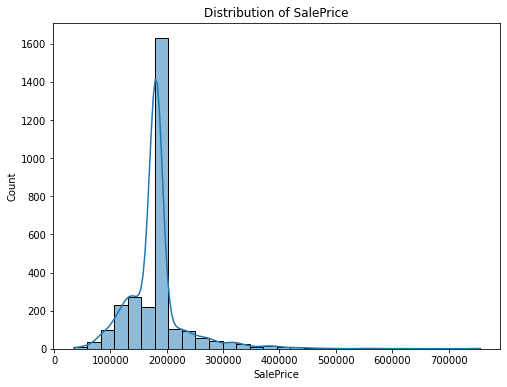

In [43]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
plt.title('Distribution of SalePrice')
sns.histplot(data=dataset, x='SalePrice', bins=30, kde=True)

<AxesSubplot:title={'center':'SalePrice by OverallCond'}, xlabel='OverallCond', ylabel='SalePrice'>

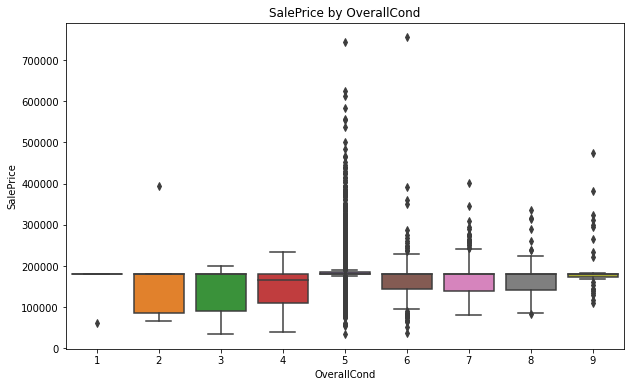

In [44]:
# Boxplot of SalePrice by OverallCond
plt.figure(figsize=(10, 6))
plt.title('SalePrice by OverallCond')
sns.boxplot(data=dataset, x='OverallCond', y='SalePrice')

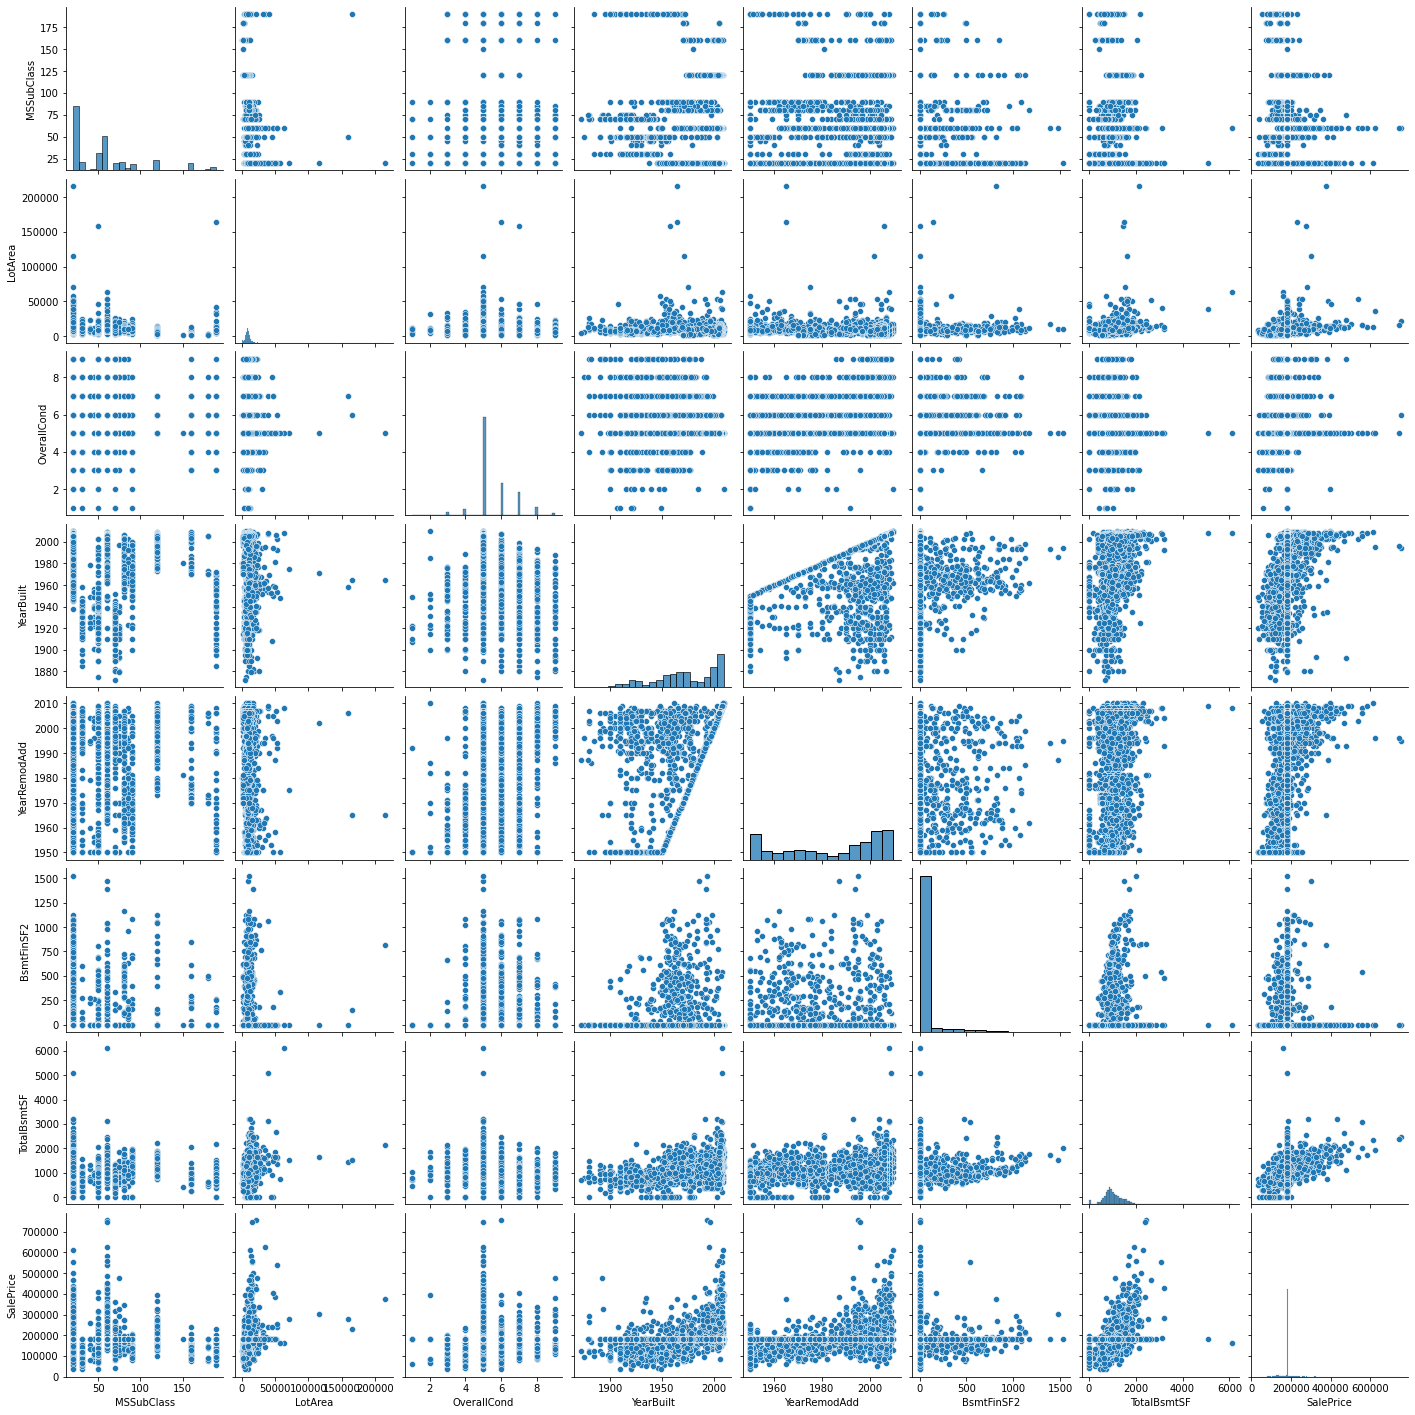

In [52]:
# Pairplot for numerical variables
num_cols = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']
pairplot_data = dataset[num_cols].copy()
pairplot_data['SalePrice'] = dataset['SalePrice'] 
sns.pairplot(pairplot_data, height=2.5)

<AxesSubplot:title={'center':'Scatterplot: LotArea vs. SalePrice'}, xlabel='LotArea', ylabel='SalePrice'>

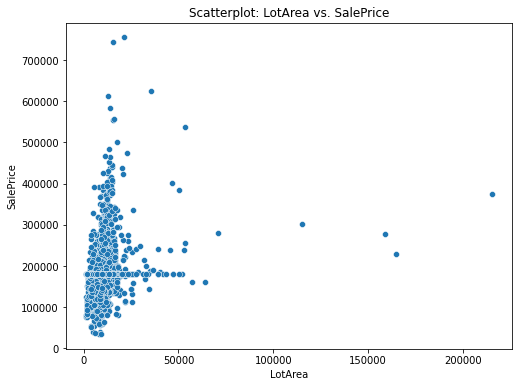

In [46]:
# Scatterplot of LotArea vs. SalePrice
plt.figure(figsize=(8, 6))
plt.title('Scatterplot: LotArea vs. SalePrice')
sns.scatterplot(data=dataset, x='LotArea', y='SalePrice')